The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data



In [2]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips', axis=1)
covid_table.tail(10)

,date,state,cases,deaths
34156,2021-11-12,Tennessee,1265579,16529
34157,2021-11-12,Texas,4272487,73014
34158,2021-11-12,Utah,571628,3347
34159,2021-11-12,Vermont,44030,393
34160,2021-11-12,Virgin Islands,7329,84
34161,2021-11-12,Virginia,942837,14321
34162,2021-11-12,Washington,752746,8979
34163,2021-11-12,West Virginia,281865,4610
34164,2021-11-12,Wisconsin,921389,9679
34165,2021-11-12,Wyoming,107483,1298


### Aggregate data across states



In [3]:
merged_data = covid_table.drop('state', axis=1)
merged_data = merged_data.groupby('date').sum()
merged_data.tail(10)

,cases,deaths
date,,
2021-11-03,46220452,750077
2021-11-04,46303539,751203
2021-11-05,46395307,753517
2021-11-06,46427246,753919
2021-11-07,46449331,754051
2021-11-08,46575792,755273
2021-11-09,46659443,756951
2021-11-10,46757833,758588
2021-11-11,46822434,759310


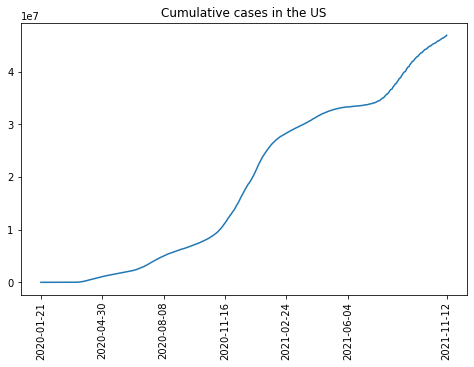

In [4]:
new_cases = np.diff(merged_data['cases'])
dates = np.array(merged_data['cases'].index)
plt.figure(figsize=(8,5))
plt.plot(dates, merged_data['cases'])
plt.xticks(dates[[0, 100, 200, 300, 400, 500, len(dates)-1]], rotation=90)
_ = plt.title('Cumulative cases in the US')

In [5]:
first_date = '2021-04-01'
last_date = '2021-05-01'
merged_data_period1 = merged_data[(merged_data['cases'].index >= first_date) & (merged_data['cases'].index <= last_date)]
merged_data_period1.insert(2,"days",np.arange(len(merged_data_period1))+1)
merged_data_period1.head(10)


,cases,deaths,days
date,,,
2021-04-01,30556079,552615,1
2021-04-02,30624668,553571,2
2021-04-03,30688804,554324,3
2021-04-04,30725627,554596,4
2021-04-05,30802221,555126,5
2021-04-06,30864193,556035,6
2021-04-07,30937283,558606,7
2021-04-08,31017741,559608,8
2021-04-09,31099323,560554,9


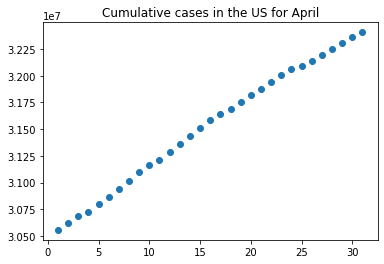

In [6]:
fig=plt.scatter(merged_data_period1['days'], merged_data_period1['cases'])
_ = plt.title('Cumulative cases in the US for April')




$$\text{cases}_i = \beta_0 + \beta_1 \text{days}_i + \epsilon_i$$


In [7]:
import statsmodels.api as sm
days = merged_data_period1['days']
cases = merged_data_period1['cases']
X = sm.add_constant(days)
model = sm.OLS(cases, X)
result1 = model.fit()
beta = [result1.params[0], result1.params[1]]
print(beta)


[30520121.735483874, 63065.57903225788]


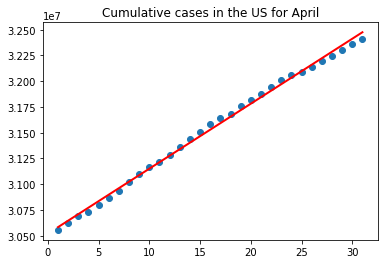

In [8]:
fig=plt.scatter(merged_data_period1['days'], merged_data_period1['cases'])
_ = plt.plot(days, beta[0] + beta[1]*days, color='red', linewidth=2)
_ = plt.title('Cumulative cases in the US for April')

In [9]:
first_date = '2021-07-01'
last_date = '2021-08-01'
merged_data_period2 = merged_data[(merged_data['cases'].index >= first_date) & (merged_data['cases'].index <= last_date)]
merged_data_period2.insert(2,"days",np.arange(len(merged_data_period2))+1)
merged_data_period2.head(10)



,cases,deaths,days
date,,,
2021-07-01,33704723,604693,1
2021-07-02,33725159,604959,2
2021-07-03,33729152,605045,3
2021-07-04,33732074,605082,4
2021-07-05,33736665,605123,5
2021-07-06,33763742,605440,6
2021-07-07,33793961,605762,7
2021-07-08,33843194,606128,8
2021-07-09,33878529,606535,9



Visualize the data


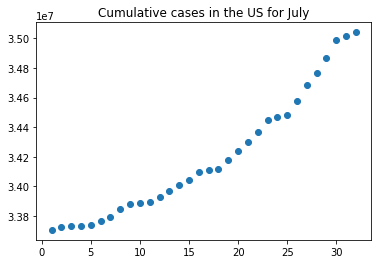

In [10]:
fig=plt.scatter(merged_data_period2['days'], merged_data_period2['cases'])
_ = plt.title('Cumulative cases in the US for July')




Compute a linear regression

In [11]:
days2 = merged_data_period2['days']
cases2 = merged_data_period2['cases']
X = sm.add_constant(days2)
model = sm.OLS(cases2, X)
result2 = model.fit()
beta2 = [result2.params[0], result2.params[1]]
print(beta2)

[33480426.44959678, 43573.60722140741]




Plot the data together with the linear regression 


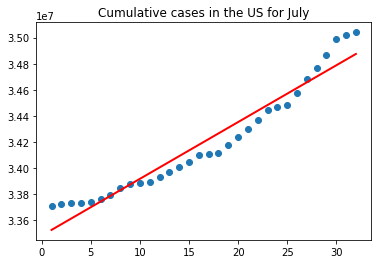

In [12]:
fig=plt.scatter(merged_data_period2['days'], merged_data_period2['cases'])
_ = plt.plot(days2, beta2[0] + beta2[1]*days2, color='red', linewidth=2)
_ = plt.title('Cumulative cases in the US for July')

In [13]:

corr_matrix = np.corrcoef(cases, beta[0] + beta[1]*days)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

corr_matrix2 = np.corrcoef(cases2, beta2[0] + beta2[1]*days2)
corr2 = corr_matrix2[0,1]
R_sq2 = corr2**2
print(R_sq2)



0.9962773637663775
0.9394190017070475


R squared is ~0.9963 for the first model and ~0.9394 for the second model, indicating that the model fits
the data better in the first case

In [14]:
y = merged_data_period1[['days', 'deaths']]
x = merged_data_period1['cases']
deaths=merged_data_period1['deaths']
X = sm.add_constant(y)
model = sm.OLS(x, X)
result3 = model.fit()
beta = [result3.params[0], result3.params[1], result3.params[2]]
print(beta)

[9414509.967954159, 33183.240441019414, 38.20116627281004]


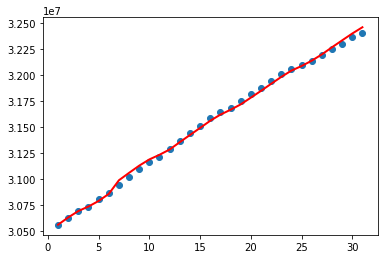

In [15]:
fig=plt.scatter(merged_data_period1['days'], merged_data_period1['cases'] )

_ = plt.plot(merged_data_period1['days'], beta[0] + beta[1]*days+beta[2]*deaths, color='red', linewidth=2)


In [16]:
y2 = merged_data_period2[['days', 'deaths']]
x2 = merged_data_period2['cases']
deaths2=merged_data_period2['deaths']


X = sm.add_constant(y2)
model = sm.OLS(x2, X)
result4 = model.fit()
beta2 = [result4.params[0], result4.params[1], result4.params[2]]
print(beta2)

[-164982286.439, -46480.735400631675, 328.6177831991736]


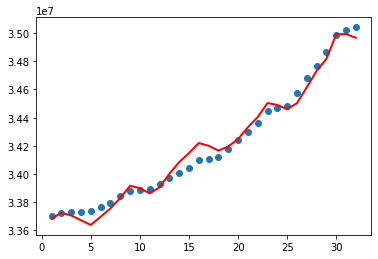

In [17]:
fig=plt.scatter(merged_data_period2['days'], merged_data_period2['cases'] )

_ = plt.plot(merged_data_period2['days'], beta2[0] + beta2[1]*days2+beta2[2]*deaths2, color='red', linewidth=2)



In [18]:
result3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7057.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.42e-38
Time:                        17:06:09   Log-Likelihood:                -358.09
No. Observations:                  31   AIC:                             722.2
Df Residuals:                      28   BIC:                             726.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.415e+06   4.25e+06      2.214      0.035    7.06e+05    1.81e+07
days        3.318e+04   6042.624      5.492      0.000    2.08e+04    4.56e+04
deaths        38.2012      7.695      4.964      0.000      22.439      53.963
==============================================================================
Omnibus:                        2.428   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.947
Skew:                          -0.471   Prob(JB):                        0.378
Kurtosis:                       2.213   Cond. No.                     5.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     837.8
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           2.22e-26
Time:                        17:06:09   Log-Likelihood:                -394.19
No. Observations:                  32   AIC:                             794.4
Df Residuals:                      29   BIC:                             798.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.65e+08    2.3e+07     -7.164      0.000   -2.12e+08   -1.18e+08
days       -4.648e+04   1.05e+04     -4.424      0.000    -6.8e+04    -2.5e+04
deaths       328.6178     38.132      8.618      0.000     250.629     406.606
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                1.095
Skew:                          -0.388   Prob(JB):                        0.579
Kurtosis:                       2.534   Cond. No.                     1.39e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Just as previously R-squared for the first fit is higher than for the second and indicates a better fit. 

In [20]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import random
import math

In [21]:
movies = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/movies.csv')
movies.head(10)

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0
3,batman forever,action,1995,5.4,77223,3032,0.036609,0.042216,0.020449,0.031003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,supergirl,action,1984,4.1,6576,3842,0.041905,0.032275,0.028891,0.026288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,the avengers,action,1998,3.4,21519,3586,0.036810,0.033463,0.024819,0.029002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000279,0.0
6,natural born killers,action,1994,7.1,73047,5129,0.028271,0.047378,0.022032,0.027296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,airplane ii: the sequel,romance,1982,5.8,15210,2328,0.027921,0.048969,0.035223,0.025773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,willow,romance,1988,7.1,33506,2006,0.038883,0.028913,0.030409,0.030409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,fast times at ridgemont high,romance,1982,7.2,31710,4703,0.047629,0.027217,0.030619,0.018711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [22]:
movies.iloc[123,[0, 1, 2, 3, 4, 5, 10, 30, 5005]]

Title      the matrix
Genre          action
Year             1999
Rating            8.7
# Votes        389480
# Words          3792
it           0.030327
not          0.008703
fling             0.0
Name: 123, dtype: object

All movie titles are unique. The `row_for_title` function provides fast access to the one row for each title. 

In [23]:
def row_for_title(title):
    
    return movies[movies["Title"]==title]

In [24]:
row_for_title('the terminator')["hey"].item()

0.000540833

In [25]:
print('Words with frequencies:', len(movies.drop(movies.columns[np.arange(6)],axis=1).columns)) 
print('Movies with genres:', len(movies))

Words with frequencies: 5000
Movies with genres: 236


In [52]:

vocab_mapping = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn1/stem.csv')
stemmed = list(movies.drop(movies.columns[np.arange(6)],axis=1).columns)
vocab_table = vocab_mapping[vocab_mapping["Stem"].isin(stemmed)]
vocab_table = vocab_table.sort_values('Stem')
vocab_table.iloc[np.arange(2000, 2010)]


,Stem,Word
25957,coloni,colonial
10851,coloni,colony
32608,coloni,colonies
2245,coloni,colonys
12087,columbia,columbia
37766,columbia,columbias
19615,column,column
1523,column,columns
12629,com,com
38458,coma,coma


In [51]:
# Set stemmed_alternating to the stemmed version of "alternating" 

alt_row=vocab_table.loc[vocab_table['Word']=='alternating']
stemmed_alternating=alt_row['Stem'].to_string()
stemmed_alternating

'2415    altern'

In [28]:
# Set unstemmed_run to the unstemmed versions of "run" (which
# should be an array of string).
stem_run = vocab_table.loc[vocab_table['Stem']=='run']
unstemmed_run=stem_run['Word'].to_list()
unstemmed_run


['run', 'runs', 'running', 'runnings', 'runned']

In [29]:
# Here we have defined the proportion of our data
# that we want to designate for training as 17/20ths
# of our total dataset.  3/20ths of the data is
# reserved for testing.

training_proportion = 17/20

num_movies = len(movies)
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

train_movies = movies.iloc[np.arange(num_train)]
test_movies = movies.iloc[np.arange(num_train, num_movies)]

print("Training: ",   len(train_movies), ";",
      "Test: ",       len(test_movies))



Training:  200 ; Test:  36


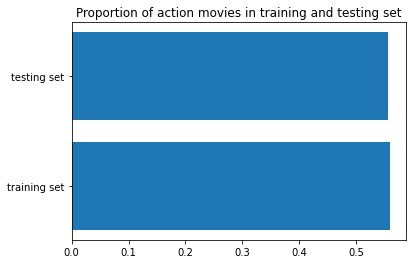

In [30]:
def action_proportion(dataframe):
    action = 0
    for i in dataframe['Genre']:
        if i=='action':
            action =action + 1
    return(action/len(dataframe['Genre']))
name=['training set', 'testing set']
proportion=[action_proportion(train_movies),action_proportion(test_movies)]     

plt.barh(name, proportion)
_ = plt.title('Proportion of action movies in training and testing set')


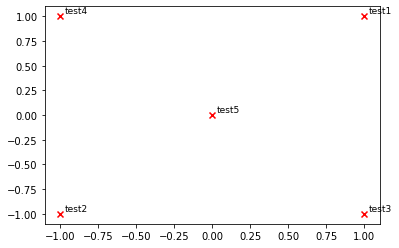

In [31]:

def plot_embeddings(M_reduced, word2Ind, words):
    """ 
        Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    for word in words:
        x, y = M_reduced[word2Ind[word]]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x+.03, y+.03, word, fontsize=9)
    plt.show()

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2Ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)


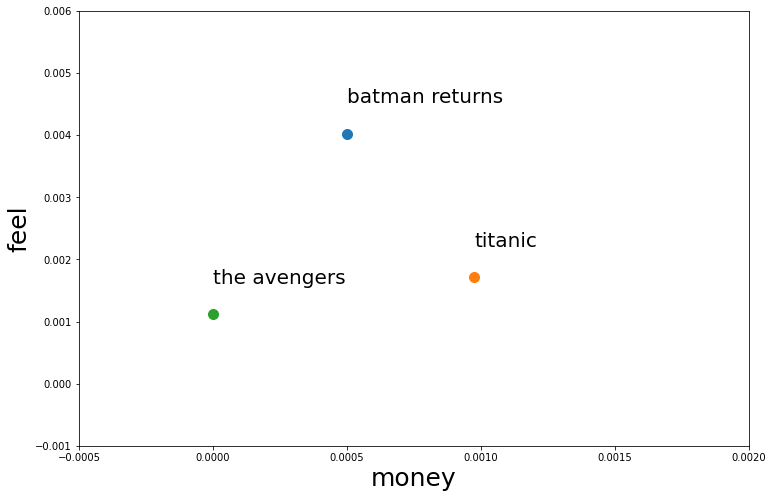

In [32]:

def plot_with_two_features(test_movie, training_movies, x_feature, y_feature):
    """Plot a test movie and training movies using two features."""
    test_row = row_for_title(test_movie)
    test_x = test_row[x_feature].item()
    test_y = test_row[y_feature].item()
    plt.scatter(test_x, test_y, s=100)
    plt.text(test_x, test_y+.0005, test_movie, fontsize=20)
    for movie in training_movies:
        row = row_for_title(movie)
        train_x = row[x_feature].item()
        train_y = row[y_feature].item()
        plt.scatter(train_x, train_y, s=100)
        plt.text(train_x, train_y+.0005, movie, fontsize=20)
    plt.show()
    
plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["titanic", "the avengers"]
plot_with_two_features("batman returns", training, "money", "feel")

In [33]:
def row_for_title(title):
    
    return movies[movies["Title"]==title]

In [34]:
batman = row_for_title("batman returns") 
avengers = row_for_title("the avengers") 
action_distance= (((batman['money'].item())-(avengers['money'].item()))**2+((batman['feel'].item())-(avengers['feel'].item()))**2)**0.5



action_distance

0.0029437356216700235

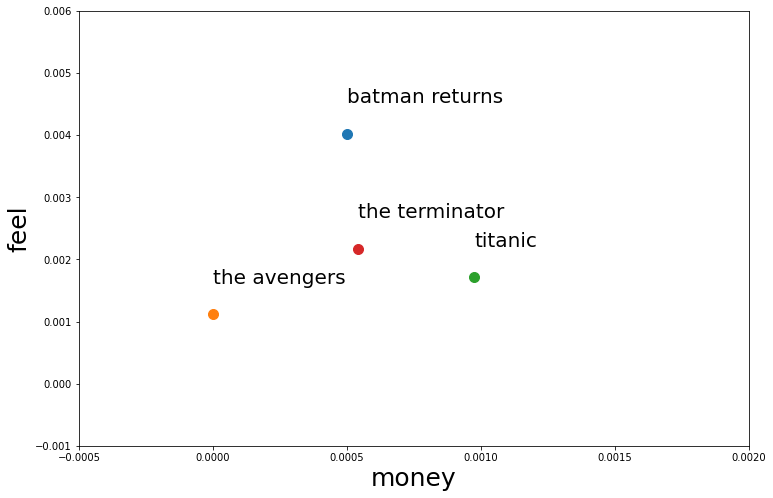

In [35]:
plt.figure(figsize=(12, 8))
plt.xlim(-0.0005, 0.002)
plt.ylim(-0.001, 0.006)
plt.xlabel('money', fontsize=25)
plt.ylabel('feel', fontsize=25)

training = ["the avengers", "titanic", "the terminator"] 
plot_with_two_features("batman returns", training, "money", "feel") 

In [36]:
def distance_two_features(title0, title1, x_feature, y_feature):
    title0 = row_for_title(title0) 
    title1 = row_for_title(title1) 
    #Compute the distance between two movies with titles title0 and title1
    return((((title0[x_feature].item())-(title1[x_feature].item()))**2+((title0[y_feature].item())-(title1[y_feature].item()))**2)**0.5)



for movie in ["the terminator", "the avengers"]:
    movie_distance = distance_two_features(movie, "batman returns", "money", "feel")
    print(movie, 'distance:\t', movie_distance)


the terminator distance:	 0.0018531387547749897
the avengers distance:	 0.0029437356216700235


In [37]:
def distance_from_batman_returns(title):
    """The distance between the given movie and "batman returns", based on the features "money" and "feel".
    
    This function takes a single argument:
      title: A string, the name of a movie.
    """
    return distance_two_features('batman returns', title, 'money', 'feel')


In [38]:
new_movie_dataframe=train_movies[['Title', 'Genre', 'money', 'feel']].copy()
new_movie_dataframe['distance to batman']=np.nan
for i in range(0,len(new_movie_dataframe['Title'])):
    new_movie_dataframe.at[i, 'distance to batman']= distance_from_batman_returns(new_movie_dataframe.iloc[i]['Title'])

new_movie_dataframe=new_movie_dataframe.sort_values('distance to batman')
close_movies = new_movie_dataframe[0:7]
close_movies


,Title,Genre,money,feel,distance to batman
61,the bridges of madison county,romance,0.000565,0.004333,0.000323
199,the fisher king,romance,0.000618,0.003504,0.000525
81,broadcast news,romance,0.000137,0.003553,0.000590
24,hellboy,action,0.000000,0.003350,0.000834
120,as good as it gets,romance,0.000523,0.003139,0.000878
193,spider-man,action,0.000347,0.003126,0.000903
111,harold and maude,romance,0.000000,0.003023,0.001112


In [39]:
def most_common(label, dataframe):
    """The most common element in a column of a table.
    
    This function takes two arguments:
      label: The label of a column, a string.
      dataframe: A dataframe.
     
    It returns the most common value in that column of that table.
    In case of a tie, it returns any one of the most common values
    """
    count = dataframe[label].value_counts()
    
    max = count.idxmax()
    return(max)
 
most_common('Genre', close_movies)


'romance'

In [40]:
def distance(features1, features2):
    """The Euclidean distance between two arrays of feature values."""
    ...
    distance=0
    for i in range(0,len(features1)):
        distance=distance+(features1[i]-features2[i])**2
    distance=distance**0.5
    return distance
firstmovie=np.array(train_movies.iloc[0])
firstmovie=firstmovie[6:]
secondmovie=np.array(test_movies.iloc[0])
secondmovie=secondmovie[6:]

distance_first_to_first = distance(firstmovie, secondmovie) 
distance_first_to_first

0.042203549225386355

In [41]:
# Set my_20_features to a list of 20 features (strings that are column labels)

my_20_features = ['marri', 'huh', 'nice', 'home', 'hous', 'happi', 'mother', 'hello', 'miss', 'boy', 'power', 'captain', 'ship', 'system', 'weve', 'move', 'world', 'three', 'run', 'command'
]
train_20 = train_movies[ my_20_features]
test_20 = test_movies[my_20_features]
pd.set_option('display.max_columns', None)



In [42]:
print("Movie:")
print(test_movies.iloc[0,[0,1]])
print("Features:")
print(test_20.iloc[0])

Movie:
Title    the mummy
Genre       action
Name: 200, dtype: object
Features:
marri      0.000321
huh        0.000963
nice       0.000321
home       0.000000
hous       0.000000
happi      0.000000
mother     0.000963
hello      0.000000
miss       0.000963
boy        0.000321
power      0.000000
captain    0.000000
ship       0.000000
system     0.000000
weve       0.000321
move       0.000000
world      0.000321
three      0.000642
run        0.000000
command    0.000321
Name: 200, dtype: float64


In [53]:


def fast_distances(test_row, train_dataframe):
    """An array of the distances between test_row and each row in train_rows.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test movie (e.g., test_20.iloc[0]).
      train_table: A table of features (for example, the whole
        table train_20)."""
    assert len(train_dataframe.columns) < 50
    counts_matrix = np.asmatrix(train_20.values)
    diff = np.tile(test_row.values, [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances


In [44]:
genre_and_distances=pd.DataFrame()
genre_and_distances['Title']=train_movies['Title']
genre_and_distances['Genre']=train_movies['Genre']
genre_and_distances['Distance']=fast_distances(test_20.iloc[0], train_20)
genre_and_distances=genre_and_distances.sort_values('Distance')
genre_and_distances



,Title,Genre,Distance
153,nurse betty,romance,0.001347
38,conspiracy theory,romance,0.001540
73,charade,romance,0.001621
60,who framed roger rabbit,action,0.001672
49,ninotchka,romance,0.001794
...,...,...,...
113,star trek vi: the undiscovered country,action,0.013021
110,the jazz singer,romance,0.014117
47,star trek v: the final frontier,action,0.015979
32,mighty morphin power rangers,action,0.017600


In [45]:
# Set my_assigned_genre to the most common genre among these.

genre_and_distances=genre_and_distances[0:5]


my_assigned_genre = most_common('Genre', genre_and_distances)


# Set my_assigned_genre_was_correct to True if my_assigned_genre
# matches the actual genre of the first movie in the test set.
my_assigned_genre_was_correct = test_movies["Genre"].iloc[0]==my_assigned_genre

print("The assigned genre, {}, was{}correct.".format(my_assigned_genre, " " if my_assigned_genre_was_correct else " not "))

The assigned genre, romance, was not correct.


In [46]:



def classify(test_row, train_rows, train_labels, k):
    genre_and_distances=pd.DataFrame()
    genre_and_distances['Distance']=fast_distances(test_row, train_rows)
    genre_and_distances['Genre']=train_labels
    genre_and_distances= genre_and_distances.sort_values('Distance')
    genre_and_distances=genre_and_distances[0:k]

    return(most_common('Genre', genre_and_distances))
  

    




In [47]:
# The sample solution first defined a row called king_kong_features.
king_kong_index=test_movies.index[test_movies['Title'] == 'king kong']
king_kong_features = test_20.loc[king_kong_index]

king_kong_genre =classify(king_kong_features, train_20, train_movies['Genre'], 11)
king_kong_genre

'action'

In [48]:
def classify_feature_row(row):
    return classify(row, train_20, train_movies['Genre'], 11)

classify_feature_row(test_20.iloc[0])

'romance'

In [49]:
test_guesses=[]
for i in range(0, len(test_20.index)):
    test_guesses.append(classify_feature_row(test_20.iloc[i]))
c=0
correct=test_movies['Genre'].values
for i in range(0, len(test_20)):
    
    if test_guesses[i]==correct[i]:
        c=c+1
proportion_correct = c/len(test_20)
proportion_correct

0.7222222222222222

In [50]:
test_movie_correctness=pd.DataFrame()
correct=test_movies['Genre'].values
test_movie_correctness['Title']=test_movies['Title']
test_movie_correctness['Genre']=test_movies['Genre']

for i in range (0, len(test_movie_correctness)):
    if (classify_feature_row(test_20.iloc[i])==correct[i]):
        test_movie_correctness.loc[test_movie_correctness.index[i], 'Was Correct'] = True
    else:
        test_movie_correctness.loc[test_movie_correctness.index[i], 'Was Correct'] = False
test_movie_correctness



test_movie_correctness.sort_values('Was Correct')

,Title,Genre,Was Correct
200,the mummy,action,False
231,legend,romance,False
226,the apartment,romance,False
220,the negotiator,action,False
216,top gun,romance,False
209,badlands,romance,False
208,the hudsucker proxy,romance,False
235,batman returns,action,False
202,men in black,action,False
207,body of evidence,romance,False
